## sSFR  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## GADGET

In [ ]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')
h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

# path = '/home/ornela/SimCLUES/'
path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,495,-1)

for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,3):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value
        
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value
        
        z = a0/aexp[0] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        
#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[0]/h
        ystr = (pstr[:,1]-cm[1])*aexp[0]/h
        zstr = (pstr[:,2]-cm[2])*aexp[0]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[0]/h
        ygas = (pgas[:,1]-cm[1])*aexp[0]/h
        zgas = (pgas[:,2]-cm[2])*aexp[0]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[0]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[0]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[0]/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[0]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[0]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[0]) + Ht *zstr/1000.
#----------------------masas----------------------------
        mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h
        
        r200 = r200*aexp[0]/h
        
        print 'r200 =', r200
        rgal=0.15*r200
        
        limit    = np.where(rstr<rgal)
        r_sort   = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])
        
        limit_str   = np.where(rstr<r200)
        rstr_sort   = np.sort(rstr[limit_str])
        rstr_indice = np.argsort(rstr[limit_str])
        
        limit_gas   = np.where(rgas<r200)
        rgas_sort   = np.sort(rgas[limit_gas])
        rgas_indice = np.argsort(rgas[limit_gas])
        
        limit_drk   = np.where(rdrk<r200)
        rdrk_sort   = np.sort(rdrk[limit_drk])
        rdrk_indice = np.argsort(rdrk[limit_drk])
        
        
        Mgal_str = cumsum((mstr[limit])[r_indice])
        
        Mc_str = cumsum((mstr[limit_str])[rstr_indice])
        
        Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])
        
        Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])
        
#------------------ calculamos r90, r50------------------------------------------
        M_gal = Mgal_str[-1]
    
        razon       = Mgal_str/M_gal
        setentaycinco,= np.where(razon < 0.75)
        cincuenta,    = np.where(razon < 0.50)
        veinticinco,  = np.where(razon < 0.25)
        
        r75 = r_sort[setentaycinco][-1]
        r50 = r_sort[cincuenta][-1]
        r25 = r_sort[veinticinco][-1]
#--------------------------------------------------------------       
        rtot = concatenate([rstr, rgas, rdrk])
        mtot = concatenate([mstr, mgas, mdrk])
        
        limit_tot   = np.where(rtot<r200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
        
        #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------
        
        Vtot = np.sqrt((G*Mc_tot*1e10)/rtot_sort)
        Vstr = np.sqrt((G*Mc_str*1e10)/rstr_sort)
        Vgas = np.sqrt((G*Mc_gas*1e10)/rgas_sort)
        Vdrk = np.sqrt((G*Mc_drk*1e10)/rdrk_sort)
        

## GASOLINE

In [ ]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path+'Gasoline/snapshots.txt', dtype='string')


snap = h5py.File(path+'Gasoline/outputs2/snap_1024.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'].value
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'].value
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'].value
    
    omega_lambda = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaL0'].value
    omega_matter = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaM0'].value

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_00'+ str('%s' %vector[i])+ '/Str/Velocities'].value

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'].value
    mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'].value

    pdrk = snap['subhalo_00'+ str('%s' %vector[i]) + '/Drk/Coordinates'].value
    mdrk = snap['subhalo_00'+ str('%s' %vector[i])+ '/Drk/Masses'].value

    H0 = h*100
    z = a0/aexp - 1.
    omega0 = omega_lambda + omega_matter
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0]) #*aexp
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    #v_x = vel[:,0] *np.sqrt(aexp) + Ht *xstr/1000.
    #v_y = vel[:,1] *np.sqrt(aexp) + Ht *ystr/1000.
    #v_z = vel[:,2] *np.sqrt(aexp) + Ht *zstr/1000.
    
    v_x = vel[:,0] 
    v_y = vel[:,1] 
    v_z = vel[:,2]

#------------------------------------------------
    r200 = r200*aexp
    
    print 'r200=', r200
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    limit_str   = np.where(rstr<r200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<r200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<r200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = cumsum((mstr[limit])[r_indice])

    Mc_str = cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon       = Mgal_str/M_gal
    setentaycinco,= np.where(razon < 0.75)
    cincuenta,    = np.where(razon < 0.50)
    veinticinco,  = np.where(razon < 0.25)

    r75 = r_sort[setentaycinco][-1]
    r50 = r_sort[cincuenta][-1]
    r25 = r_sort[veinticinco][-1]
#--------------------------------------------------------------       
    rtot= concatenate([rstr, rgas, rdrk])
    mtot= concatenate([mstr, mgas, mdrk])

    limit_tot = np.where(rtot<r200)
    rtot_sort = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])
    
    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])


#calculo rvir------------------------------------------
    '''rho_crit=3*(H0/1000)**2/(8*pi*G)
    rho=Mc_tot1*3/(4*pi*rtot_sort1**3)
    delta=rho/rho_crit
    kk=np.where(delta<200)
    rvir=rtot_sort1[kk]
    print rvir[0],(delta[kk])[0]'''
#--------------------------------------------------------------
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]

    rtot_sort = rtot_sort[1:]
    rstr_sort = rstr_sort[1:]
    rgas_sort = rgas_sort[1:]
    rdrk_sort = rdrk_sort[1:]

    Vtot = np.sqrt((G*Mc_tot)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk)/rdrk_sort)


In [4]:
counts_M31gd, bins_M31gd = np.histogram(tf_M31gd, bins=30)
countsb_M31gd, binsb_M31gd = np.histogram(tf_M31gd[mask_M31gd], bins=30)

counts_MWgd, bins_MWgd = np.histogram(tf_MWgd, bins=30)

counts_M33gd, bins_M33gd = np.histogram(tf_M33gd, bins=30)

#-------------------------------------------------------------------------------------
M1, = np.where(r_M31gs>0)
M2, = np.where(r_M31gs[mask_M31gs]>0)

counts_M31gs, bins_M31gs = np.histogram(tf_M31gs[M1], bins=30 )
countsb_M31gs, binsb_M31gs = np.histogram(tf_M31gs[mask_M31gs][M2], bins=30)

M1, = np.where(r_MWgs>0)
M2, = np.where(r_MWgs[mask_MWgs]>0)

counts_MWgs, bins_MWgs = np.histogram(tf_MWgs[M1], bins=30)
countsb_MWgs, binsb_MWgs = np.histogram(tf_MWgs[mask_MWgs][M2], bins=30)

counts_M33gs, bins_M33gs = np.histogram(tf_M33gs, bins=30)


In [5]:
SFR_M31gd = np.zeros(30)
SFR_MWgd  = np.zeros(30)
SFR_M33gd = np.zeros(30)

SFR_M31gs = np.zeros(30)
SFR_MWgs  = np.zeros(30)
SFR_M33gs = np.zeros(30)

for i in range(30):
    SFR_M31gd[i] = counts_M31gd[i]/(bins_M31gd[i+1]-bins_M31gd[i])
    SFR_MWgd[i]  = counts_MWgd[i] /(bins_MWgd[i+1]-bins_MWgd[i])    
    SFR_M33gd[i] = counts_M33gd[i]/(bins_M33gd[i+1]-bins_M33gd[i])    
    
    SFR_M31gs[i] = counts_M31gs[i]/(bins_M31gs[i+1]-bins_M31gs[i])
    SFR_MWgs[i]  = counts_MWgs[i] /(bins_MWgs[i+1]-bins_MWgs[i])
    SFR_M33gs[i] = counts_M33gs[i]/(bins_M33gs[i+1]-bins_M33gs[i])
        

In [20]:
path = '/home/omarioni/'

M31gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_radios.dat')
Mgal_M31gd = M31gd[4]
print Mgal_M31gd

MWgd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_radios.dat')
Mgal_MWgd = MWgd[4]

M33gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M33_radios.dat')
Mgal_M33gd = M33gd[4]

M31gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_radios.dat')
Mgal_M31gs = M31gs[4]
print Mgal_M31gs

MWgs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_radios.dat')
Mgal_MWgs = MWgs[4]

M33gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M33_radios.dat')
Mgal_M33gs = M33gs[4]

13324700593.948364
11138549760.0


In [10]:
sSFR_M31gd = SFR_M31gd/Mgal_M31gd
sSFR_MWgd  = SFR_MWgd/Mgal_MWgd
sSFR_M33gd = SFR_M33gd/Mgal_M33gd

sSFR_M31gs = SFR_M31gs/Mgal_M31gs
sSFR_MWgs  = SFR_MWgs/Mgal_MWgs
sSFR_M33gs = SFR_M33gs/Mgal_M33gs

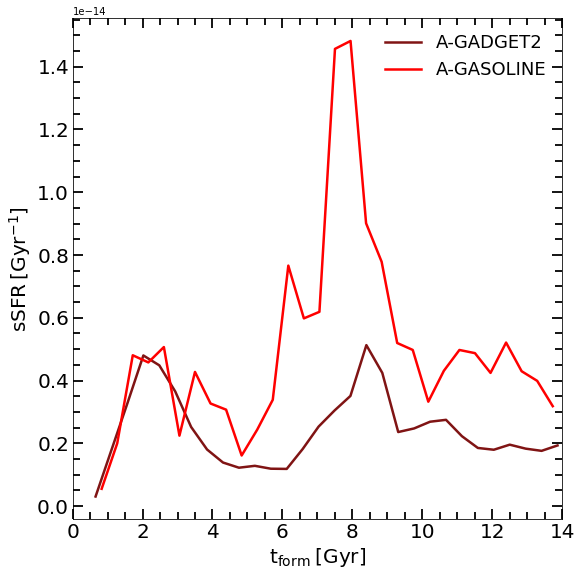

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))#,sharey=True
#                        gridspec_kw = {'height_ratios':[3,1,3,1]}
fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.97, top = 0.97)

ax.plot(bins_M31gd[1:] ,sSFR_M31gd*1e-9,'-', lw=2.5, color='#801414', label='A-GADGET2')
ax.plot(bins_M31gs[1:] ,sSFR_M31gs*1e-9,'-', lw=2.5, color='#FF0000', label='A-GASOLINE')
# ax.plot(bins_MWgd[1:]  ,sSFR_MWgd*1e-9, '-', lw=2.5, color='#020076', label='B-GADGET2')
# ax.plot(bins_MWgs[1:]  ,sSFR_MWgs*1e-9, '-', lw=2.5, color='#FF963E', label='B-GASOLINE')
# ax.plot(bins_M33gd[1:] ,sSFR_M33gd*1e-9,'-', lw=2.5, color='#5075FE', label='C-GADGET2')
# ax.plot(bins_M33gs[1:] ,sSFR_M33gs*1e-9,'-', lw=2.5, color='#4FBFFF', label='C-GASOLINE')


ax.set_ylabel(r'$\mathrm{sSFR\:[yr^{-1}]}$', fontsize=20)
ax.set_xlabel(r'$\mathrm{t_{form}\:[Gyr]}$',fontsize=20)
ax.set_xticks([0,2,4,6,8,10,12,14])
# ax.yaxis.set_major_locator(MultipleLocator(0.1))
# ax.yaxis.set_major_formatter(NullFormatter())
# ax.set_yticklabels(['','','$0.1$','','$0.3$','','$0.5$','','$0.7$'])
# ax.axes.ticklabel_format(style='sci')
# ax.set_ylim(0,0.7)
ax.set_xlim(0,14)
ax.minorticks_on()
ax.tick_params( labelsize=20)
ax.tick_params('both', length=7, width=1.8,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=10, width=1.8,which='major', direction='in', right='on',top='on')
# ax.yaxis.set_minor_locator(MultipleLocator(0.025)) 

ax.legend(fontsize=18,frameon=False, loc=1)

# fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/sSFR_time.pdf', dpi = 100, xxbox_inches='tight')

plt.show()